# Q1) Calculate probability from the given dataset for the below cases

Data_set: Cars.csv <br>
Calculate the probability of MPG of Cars for the below cases. <br>
MPG <- Cars$MPG <br>
a.	P(MPG>38) <br>
b.	P(MPG<40) <br>
c.	P (20<MPG<50)


Lets load our dataset and necessary libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
cars = pd.read_csv('Cars.csv')
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


To calculate probability of MPG > 38, MPG < 40 and MPG > 20 < 50

In [3]:
MPG = cars['MPG']

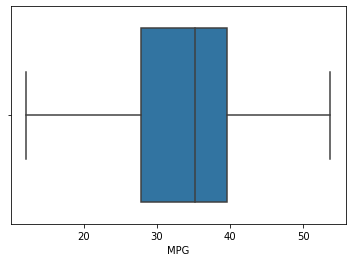

In [9]:
sns.boxplot(MPG)

In [8]:
# MPG > 38

1-stats.norm.cdf(38,MPG.mean(),MPG.std())

0.3475939251582705

In [10]:
# MPG < 40
stats.norm.cdf(40,MPG.mean(),MPG.std())

0.7293498762151616

In [12]:
# P (20<MPG<50)
stats.norm.cdf(50,MPG.mean(),MPG.std())-stats.norm.cdf(20,MPG.mean(),MPG.std())

0.8988689169682046

In [13]:
#Q2) Check whether the data follows normal distribution
#a)	Check whether the MPG of Cars follows Normal Distribution Dataset: Cars.csv
#b)	Check Whether the Adipose Tissue (AT) and Waist Circumference (Waist) from wc-at data set follows Normal Distribution
#Dataset: wc-at.csv


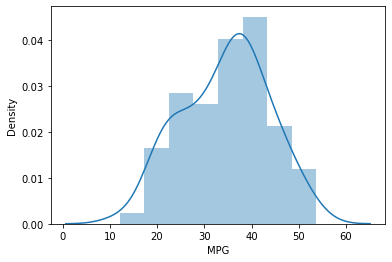

In [14]:
sns.distplot(MPG)
plt.xlabel('MPG')
plt.ylabel('Density')
plt.show()

In [17]:
MPG.describe()

count    81.000000
mean     34.422076
std       9.131445
min      12.101263
25%      27.856252
50%      35.152727
75%      39.531633
max      53.700681
Name: MPG, dtype: float64

The mean and median of the data are very close to each other so we can say data is following normal distribution

In [20]:
data = pd.read_csv('wc-at.csv')

In [21]:
data

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


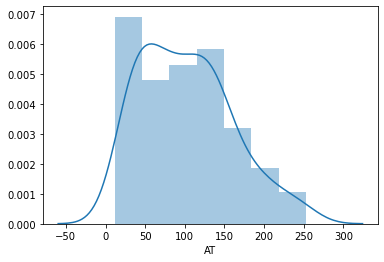

In [24]:
sns.distplot(data.AT)
plt.xlabel('AT')
plt.show()

AT is following normal distribution

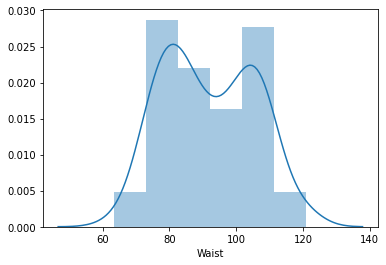

In [26]:
sns.distplot(data.Waist)
plt.xlabel('Waist')
plt.show()

In [27]:
data.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


Waist has lower median then mean, which means data is little negative skewed

In [28]:
# Q3) Calculate the Z scores of 90% confidence interval,94% confidence interval, 60% confidence interval

In [36]:
print('Z score at 90% confidence interval is ',stats.norm.ppf(0.95))
print('Z score at 94% confidence interval is ',stats.norm.ppf(0.97))
print('Z score at 60% confidence interval is ',stats.norm.ppf(0.8))

Z score at 90% confidence interval is  1.6448536269514722
Z score at 94% confidence interval is  1.8807936081512509
Z score at 60% confidence interval is  0.8416212335729143


In [37]:
# Q4) Calculate the t scores of 95% confidence interval, 96% confidence interval, 99% confidence interval for sample size of 25

In [38]:
print('T score of 95% confidence interval is ',stats.t.ppf(0.975,24)) # 1-n = 24
print('T score of 96% confidence interval is ',stats.t.ppf(0.98,24))
print('T score of 99% confidence interval is ',stats.t.ppf(0.995,24))

T score of 95% confidence interval is  2.0638985616280205
T score of 96% confidence interval is  2.1715446760080677
T score of 99% confidence interval is  2.796939504772804


In [41]:
# Q5) A Government company claims that an average light bulb lasts 270 days. A researcher randomly selects 18 bulbs for testing. The sampled bulbs last an average of 260 days, with a standard deviation of 90 days. If the CEO's claim were true, what is the probability that 18 randomly selected bulbs would have an average life of no more than 260 days

In [42]:
# Lets Assume Null Hypothesis is: Ho = Avg life of Bulb >= 260 days
# Alternate Hypothesis is : H1 = Avg life of Bulb < 260 days

# lets find the t-score at x=260: t=(s_mean-P_mean)/(s_SD/sqrt(n))

t = (260-270)/(90/18**0.5)
t

-0.4714045207910317

In [43]:
# Lets find P(X>260) for null hypothesis

p_value = 1-stats.t.cdf(abs(-0.471404),df=17)
p_value

0.32167271782057305

In [44]:
# Since P value is > 0.05, we will reject the null hypothesis

Q6) The time required for servicing transmissions is normally distributed with  = 45 minutes and  = 8 minutes. The service <br> manager plans to have work begin on the transmission of a customer’s car 10 minutes after the car is dropped off and the <br>
 customer is told that the car will be ready within 1 hour from drop-off. What is the probability that the service manager <br> cannot meet his commitment? <br>
A.  0.3875 <br>
B.  0.2676 <br>
C. 0.5 <br>
D. 0.6987 <br>


In [52]:
# Lets Find Z score at X=50
Z = (50-45)/8
Z

0.625

In [54]:
# Find probability P(X>50) = 1-stats.norm.cdf(abs(z_score))
1-stats.norm.cdf(abs(0.625))

0.26598552904870054

Answer is option B, there is 26.76% chance that service manager cannot meet his committment of getting car ready in 1 hour

Q7) The current age (in years) of 400 clerical employees at an insurance claims processing center is normally distributed with mean <br>= 38 and Standard deviation =6. For each statement below, please specify True/False. If false, briefly explain why. <br>

A. More employees at the processing center are older than 44 than between 38 and 44. <br>

B. A training program for employees under the age of 30 at the center would be expected to attract about 36 employees. <br>

In [55]:
# A. More employees at the processing center are older than 44 than between 38 and 44.
# p(X>44); Employees older than 44 yrs of age
1-stats.norm.cdf(44,loc=38,scale=6)

0.15865525393145707

In [56]:
# p(38<X<44); Employees between 38 to 44 yrs of age
stats.norm.cdf(44,38,6)-stats.norm.cdf(38,38,6)

0.3413447460685429

In [57]:
# B. A training program for employees under the age of 30 at the center would be expected to attract about 36 employees.


In [58]:
# P(X<30); Employees under 30 yrs of age
stats.norm.cdf(30,38,6)

0.09121121972586788

In [59]:
# No. of employees attending training program from 400 nos. is N*P(X<30)
400*stats.norm.cdf(30,38,6)

36.484487890347154

Q9) Let X ~ N(100, 20^2) its (100, 20 square).Find two values, a and b, symmetric about the mean, such that the probability of <br> the random variable taking a value between them is 0.99. <br>
A.90.5, 105.9 <br>
B. 80.2, 119.8  <br>
C. 22, 78 <br>
D.  48.5, 151.5 <br>
E.   90.1, 109.9


In [60]:
stats.norm.interval(0.99,100,20)


(48.48341392902199, 151.516586070978)

Answer is option D

Q10) Consider a company that has two different divisions. The annual profits from the two divisions are independent and have distributions Profit1 ~ N(5, 3^2) and Profit2 ~ N(7, 4^2) respectively. Both the profits are in $ Million. Answer the following questions about the total profit of the company in Rupees. Assume that $1 = Rs. 45 A. Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company. B. Specify the 5th percentile of profit (in Rupees) for the company C. Which of the two divisions has a larger probability of making a loss in a given year?

In [61]:
# Mean profits from two different divisions of a company = Mean1 + Mean2
Mean = 5+7
print('Mean Profit is Rs', Mean*45,'Million')

Mean Profit is Rs 540 Million


In [62]:
# Variance of profits from two different divisions of a company = SD^2 = SD1^2 + SD2^2
SD = np.sqrt((9)+(16))
print('Standard Deviation is Rs', SD*45, 'Million')

Standard Deviation is Rs 225.0 Million


In [63]:
# A. Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company.
print('Range is Rs',(stats.norm.interval(0.95,540,225)),'in Millions')

Range is Rs (99.00810347848784, 980.9918965215122) in Millions


In [64]:
# B. Specify the 5th percentile of profit (in Rupees) for the company
# To compute 5th Percentile, we use the formula X=μ + Zσ; wherein from z table, 5 percentile = -1.645
X= 540+(-1.645)*(225)
print('5th percentile of profit (in Million Rupees) is',np.round(X,))

5th percentile of profit (in Million Rupees) is 170.0


In [65]:
# C. Which of the two divisions has a larger probability of making a loss in a given year?
# Probability of Division 1 making a loss P(X<0)
stats.norm.cdf(0,5,3)

0.0477903522728147

In [66]:
# Probability of Division 2 making a loss P(X<0)
stats.norm.cdf(0,7,4)

0.040059156863817086